In [1]:
from typing import Annotated, Literal, TypedDict

from langchain_core.messages import HumanMessage
from langchain_core.tools import tool
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, START, StateGraph, MessagesState
from langgraph.prebuilt import ToolNode

d:\LangGraph-End-to-End-Course\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
GROQ_API_KEY=os.getenv("GROQ_API_KEY")
os.environ["GROQ_API_KEY"]= GROQ_API_KEY

In [3]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="llama-3.1-8b-instant")
llm.invoke("hi").content

'How can I assist you today?'

In [4]:
@tool
def search(query: str):
    """this is my custom tool."""
    if "sf" in query.lower() or "san francisco" in query.lower():
        return "It's 60 degrees and foggy."
    return "It's 90 degrees and sunny."

In [9]:
search.invoke({"query": "what is the temperature in sf?"})


"It's 60 degrees and foggy."

In [10]:
search.invoke({"query": "what is a weather in india?"})


"It's 90 degrees and sunny."

In [11]:
tools=[search]

In [12]:
tools

[StructuredTool(name='search', description='this is my custom tool.', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000012DC50ABCE0>)]

In [13]:
tool_node=ToolNode(tools)

In [14]:
tool_node

tools(tags=None, recurse=True, explode_args=False, func_accepts={'config': ('N/A', <class 'inspect._empty'>), 'runtime': ('N/A', <class 'inspect._empty'>)}, _tools_by_name={'search': StructuredTool(name='search', description='this is my custom tool.', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000012DC50ABCE0>)}, _injected_args={'search': _InjectedArgs(state={}, store=None, runtime=None)}, _handle_tool_errors=<function _default_handle_tool_errors at 0x0000012DC4D89DA0>, _messages_key='messages', _wrap_tool_call=None, _awrap_tool_call=None)

In [15]:
llm

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 8192, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x0000012DC50216A0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000012DC50223C0>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [16]:
llm_with_tool=llm.bind_tools(tools)

In [17]:
llm_with_tool.invoke("hi")

AIMessage(content="I'm happy to help you with any questions or tasks you may have. What would you like to do today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 209, 'total_tokens': 233, 'completion_time': 0.041973823, 'completion_tokens_details': None, 'prompt_time': 0.01420083, 'prompt_tokens_details': None, 'queue_time': 0.006011393, 'total_time': 0.056174653}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3bef-3cb8-7cb1-8b13-a069aa21376f-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 209, 'output_tokens': 24, 'total_tokens': 233})

In [18]:
def call_model(state: MessagesState):
    messages = state['messages']
    print(f"ye mera message hai {messages}")
    response = llm_with_tool.invoke(messages)
    return {"messages": [response]}

In [19]:
def should_continue(state: MessagesState) -> Literal["tools", END]:
    print(f"here is a state from should continue {state}")
    messages = state['messages']
    last_message = messages[-1]
    print(f"here is a last message from should continue {last_message}")
    if last_message.tool_calls:
        return "tools"
    return END


In [20]:
response = llm_with_tool.invoke("hi how are you?")
state={"messages": [response]}

In [21]:
state={"messages": [response]}

In [22]:
messages = state['messages']

In [23]:
messages[-1]

AIMessage(content="I'm functioning properly, thank you for asking. Is there something I can help you with today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 213, 'total_tokens': 234, 'completion_time': 0.033249345, 'completion_tokens_details': None, 'prompt_time': 0.013815927, 'prompt_tokens_details': None, 'queue_time': 0.005352418, 'total_time': 0.047065272}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3bef-d48b-7760-a770-5dc6ce59e81d-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 213, 'output_tokens': 21, 'total_tokens': 234})

In [24]:
response = llm_with_tool.invoke("what is a temprature in india?")
state={"messages": [response]}

In [25]:
response.tool_calls

[]

In [26]:
state

{'messages': [AIMessage(content='<brave_search>temperature in India</brave_search>', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 217, 'total_tokens': 230, 'completion_time': 0.033728254, 'completion_tokens_details': None, 'prompt_time': 0.01474665, 'prompt_tokens_details': None, 'queue_time': 0.005187869, 'total_time': 0.048474904}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3bf0-67a1-7271-bc94-6b3d220ca148-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 217, 'output_tokens': 13, 'total_tokens': 230})]}

In [27]:
should_continue(state)

here is a state from should continue {'messages': [AIMessage(content='<brave_search>temperature in India</brave_search>', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 217, 'total_tokens': 230, 'completion_time': 0.033728254, 'completion_tokens_details': None, 'prompt_time': 0.01474665, 'prompt_tokens_details': None, 'queue_time': 0.005187869, 'total_time': 0.048474904}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3bf0-67a1-7271-bc94-6b3d220ca148-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 217, 'output_tokens': 13, 'total_tokens': 230})]}
here is a last message from should continue content='<brave_search>temperature in India</brave_search>' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 217, 'total_tokens': 2

'__end__'

In [28]:
print(MessagesState)

<class 'langgraph.graph.message.MessagesState'>


In [29]:
# Define a new graph
workflow = StateGraph(MessagesState)

workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

workflow.add_edge(START, "agent")

workflow.add_conditional_edges("agent",should_continue,{"tools": "tools", END: END})

app = workflow.compile()

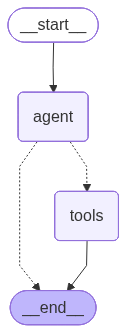

In [31]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [32]:
state=app.invoke({"messages": ["what is the weather in sf"]})

ye mera message hai [HumanMessage(content='what is the weather in sf', additional_kwargs={}, response_metadata={}, id='a86390c8-0fe1-4355-b186-2c04228364cc')]
here is a state from should continue {'messages': [HumanMessage(content='what is the weather in sf', additional_kwargs={}, response_metadata={}, id='a86390c8-0fe1-4355-b186-2c04228364cc'), AIMessage(content='<brave_search> {"query": "current weather in San Francisco"} </brave_search>', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 214, 'total_tokens': 234, 'completion_time': 0.042493289, 'completion_tokens_details': None, 'prompt_time': 0.013837381, 'prompt_tokens_details': None, 'queue_time': 0.005137443, 'total_time': 0.05633067}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3bf6-207a-7593-8da9-91367e9d659e-0', tool_calls=[], inval

In [33]:
state

{'messages': [HumanMessage(content='what is the weather in sf', additional_kwargs={}, response_metadata={}, id='a86390c8-0fe1-4355-b186-2c04228364cc'),
  AIMessage(content='<brave_search> {"query": "current weather in San Francisco"} </brave_search>', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 214, 'total_tokens': 234, 'completion_time': 0.042493289, 'completion_tokens_details': None, 'prompt_time': 0.013837381, 'prompt_tokens_details': None, 'queue_time': 0.005137443, 'total_time': 0.05633067}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3bf6-207a-7593-8da9-91367e9d659e-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 214, 'output_tokens': 20, 'total_tokens': 234})]}

In [34]:
app.invoke({"messages": ["hi how are you?"]})

ye mera message hai [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='75dbb35b-b254-4bb1-8eee-24c9996eeca5')]
here is a state from should continue {'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='75dbb35b-b254-4bb1-8eee-24c9996eeca5'), AIMessage(content="I'm functioning properly, thank you for asking.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 213, 'total_tokens': 224, 'completion_time': 0.019196304, 'completion_tokens_details': None, 'prompt_time': 0.013126031, 'prompt_tokens_details': None, 'queue_time': 0.005507028, 'total_time': 0.032322335}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3bf6-5e40-7f53-9542-47bed207117f-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens'

{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='75dbb35b-b254-4bb1-8eee-24c9996eeca5'),
  AIMessage(content="I'm functioning properly, thank you for asking.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 213, 'total_tokens': 224, 'completion_time': 0.019196304, 'completion_tokens_details': None, 'prompt_time': 0.013126031, 'prompt_tokens_details': None, 'queue_time': 0.005507028, 'total_time': 0.032322335}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3bf6-5e40-7f53-9542-47bed207117f-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 213, 'output_tokens': 11, 'total_tokens': 224})]}

In [35]:
call_model(state)

ye mera message hai [HumanMessage(content='what is the weather in sf', additional_kwargs={}, response_metadata={}, id='a86390c8-0fe1-4355-b186-2c04228364cc'), AIMessage(content='<brave_search> {"query": "current weather in San Francisco"} </brave_search>', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 214, 'total_tokens': 234, 'completion_time': 0.042493289, 'completion_tokens_details': None, 'prompt_time': 0.013837381, 'prompt_tokens_details': None, 'queue_time': 0.005137443, 'total_time': 0.05633067}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3bf6-207a-7593-8da9-91367e9d659e-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 214, 'output_tokens': 20, 'total_tokens': 234})]


{'messages': [AIMessage(content='', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 1, 'prompt_tokens': 233, 'total_tokens': 234, 'completion_time': 0.004307184, 'completion_tokens_details': None, 'prompt_time': 0.034049251, 'prompt_tokens_details': None, 'queue_time': None, 'total_time': 0.038356435}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3bf6-8190-7422-b9a8-282ac2f9bfcb-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 233, 'output_tokens': 1, 'total_tokens': 234})]}

In [36]:
for output in app.stream(state):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

ye mera message hai [HumanMessage(content='what is the weather in sf', additional_kwargs={}, response_metadata={}, id='a86390c8-0fe1-4355-b186-2c04228364cc'), AIMessage(content='<brave_search> {"query": "current weather in San Francisco"} </brave_search>', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 214, 'total_tokens': 234, 'completion_time': 0.042493289, 'completion_tokens_details': None, 'prompt_time': 0.013837381, 'prompt_tokens_details': None, 'queue_time': 0.005137443, 'total_time': 0.05633067}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3bf6-207a-7593-8da9-91367e9d659e-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 214, 'output_tokens': 20, 'total_tokens': 234})]
here is a state from should continue {'messages': [HumanMessage(content='what is the weath

### **now the next step**

In [37]:
from langchain_community.tools.tavily_search import TavilySearchResults
tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

C:\Users\Suresh Beekhani\AppData\Local\Temp\ipykernel_17440\3493267078.py:2: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tool = TavilySearchResults(max_results=2)


[{'title': 'What is LangGraph? - IBM',
  'url': 'https://www.ibm.com/think/topics/langgraph',
  'content': 'Nodes: In LangGraph, nodes represent individual components or agents within an AI workflow. Nodes can be thought of as “actors” that interact with each other in a specific way. For example,to add nodes for tool calling, one can use the ToolNode. Another example, the next node, refers to the node that will be executed following the current one.\n\nEdges: Edges are a function within Python that determines which node to execute next based on the current state. Edges can be conditional branches or fixed transitions.\n\n#### Tools\n\nRAG: Retrieval-augmented generation (RAG) combines the power of LLMs with contextual information from external sources by retrieving relevant documents, which are then used as input for answer generation. [...] Workflows: Workflows are the sequences of node interactions that define an AI workflow. By arranging nodes into a workflow, users can create more 

In [38]:
tool_node = ToolNode(tools=[tool])

In [39]:
updated_llm=llm.bind_tools(tools)

In [40]:
updated_llm.invoke("hi")

AIMessage(content="I'm happy to help you with any questions or tasks you have. What do you need assistance with today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 279, 'total_tokens': 302, 'completion_time': 0.05197504, 'completion_tokens_details': None, 'prompt_time': 0.022054434, 'prompt_tokens_details': None, 'queue_time': 0.006421853, 'total_time': 0.074029474}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3bf7-3fa0-7b90-9ce0-eaf564af53f9-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 279, 'output_tokens': 23, 'total_tokens': 302})

In [41]:
updated_llm.invoke("hi how are you?")

AIMessage(content="I'm functioning properly, thank you for asking. What can I help with today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 283, 'total_tokens': 301, 'completion_time': 0.030321212, 'completion_tokens_details': None, 'prompt_time': 0.019922518, 'prompt_tokens_details': None, 'queue_time': 0.006445949, 'total_time': 0.05024373}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3bf7-60f0-71d2-9c55-11ee69cdf900-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 283, 'output_tokens': 18, 'total_tokens': 301})

In [42]:
def call_model(state: MessagesState):
    messages = state['messages']
    print(f"ye mera message hai from tavilay {messages}")
    response = updated_llm.invoke(messages)
    return {"messages": [response]}

In [43]:
def route_tools(
    state:MessagesState ,
):
    """
    Use in the conditional_edge to route to the ToolNode if the last message
    has tool calls. Otherwise, route to the end.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in input state to tool_edge: {state}")
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return END

In [44]:
# Define a new graph
workflow2 = StateGraph(MessagesState)

workflow2.add_node("agent", call_model)
workflow2.add_node("tools", tool_node)

workflow2.add_edge(START, "agent")

workflow2.add_conditional_edges("agent",route_tools,{"tools": "tools", END: END})

workflow2.add_edge("tools", 'agent')

app2 = workflow2.compile()



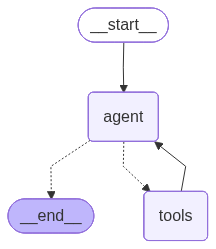

In [45]:
from IPython.display import Image, display

try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [46]:
app2.invoke({"messages":["hi how are you?"]})

ye mera message hai from tavilay [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='c76fbde9-af62-4aea-9cec-789bd6793ee9')]


{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='c76fbde9-af62-4aea-9cec-789bd6793ee9'),
  AIMessage(content="I'm just a language model, so I don't have feelings or emotions like humans do. However, I'm functioning properly and ready to assist you with any questions or tasks you may have. How can I help you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 283, 'total_tokens': 330, 'completion_time': 0.066210513, 'completion_tokens_details': None, 'prompt_time': 0.017293132, 'prompt_tokens_details': None, 'queue_time': 0.005186878, 'total_time': 0.083503645}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3bf8-07ca-74c1-a32c-8653867db9d5-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 283, 'output_tokens': 47

In [47]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

In [48]:
# Define a new graph
workflow3 = StateGraph(MessagesState)

workflow3.add_node("agent", call_model)
workflow3.add_node("tools", tool_node)

workflow3.add_edge(START, "agent")

workflow3.add_conditional_edges("agent",route_tools,{"tools": "tools", END: END})

workflow3.add_edge("tools", 'agent')

app3 = workflow3.compile(checkpointer = memory)

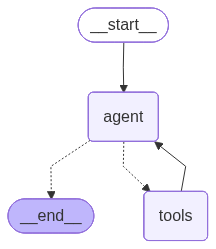

In [49]:
from IPython.display import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [50]:
config = {"configurable": {"thread_id": "1"}}

In [58]:
user_input = "Hi there! My name is suresh beekhani."

In [59]:
events = app3.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there! My name is suresh beekhani.
ye mera message hai from tavilay [HumanMessage(content='Hi there! My name is Sunny.', additional_kwargs={}, response_metadata={}, id='54deeba3-f6f9-4abf-8ff7-c07cdc45cf8e'), AIMessage(content="Hello Sunny. It's nice to meet you. Is there anything I can help you with today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 286, 'total_tokens': 307, 'completion_time': 0.031317769, 'completion_tokens_details': None, 'prompt_time': 0.030681639, 'prompt_tokens_details': None, 'queue_time': 0.006224422, 'total_time': 0.061999408}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3bf8-7f23-7ff1-9418-331a2affe6a2-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens':

In [60]:
user_input = "can you tell me what was my name?"

# The config is the **second positional argument** to stream() or invoke()!
events = app3.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

can you tell me what was my name?
ye mera message hai from tavilay [HumanMessage(content='Hi there! My name is Sunny.', additional_kwargs={}, response_metadata={}, id='54deeba3-f6f9-4abf-8ff7-c07cdc45cf8e'), AIMessage(content="Hello Sunny. It's nice to meet you. Is there anything I can help you with today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 286, 'total_tokens': 307, 'completion_time': 0.031317769, 'completion_tokens_details': None, 'prompt_time': 0.030681639, 'prompt_tokens_details': None, 'queue_time': 0.006224422, 'total_time': 0.061999408}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3bf8-7f23-7ff1-9418-331a2affe6a2-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 286

In [61]:
config

{'configurable': {'thread_id': '1'}}

In [62]:
app3.checkpointer

In [63]:
memory.get(config)

{'v': 4,
 'ts': '2026-02-08T06:38:54.134076+00:00',
 'id': '1f104b8d-6514-691c-800c-46052876ac9f',
 'channel_versions': {'__start__': '00000000000000000000000000000013.0.4655505002955923',
  'messages': '00000000000000000000000000000014.0.8014258037667281',
  'branch:to:agent': '00000000000000000000000000000014.0.8014258037667281'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000012.0.9721877122716093'},
  'agent': {'branch:to:agent': '00000000000000000000000000000013.0.4655505002955923'}},
 'updated_channels': ['messages'],
 'channel_values': {'messages': [HumanMessage(content='Hi there! My name is Sunny.', additional_kwargs={}, response_metadata={}, id='54deeba3-f6f9-4abf-8ff7-c07cdc45cf8e'),
   AIMessage(content="Hello Sunny. It's nice to meet you. Is there anything I can help you with today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 286, 'total_tokens': 307, 'completion_time':